In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
heart =pd.read_csv(r"/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [4]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart.shape

(303, 14)

In [6]:
# checking for null values
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# checking for duplicate values
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# dropping duplicates
heart.drop_duplicates(keep='first',inplace=True)

In [9]:
# checking shape now
heart.shape

(302, 14)

In [10]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# studying columns
dict = {}
for i in list(heart.columns):
    dict[i] = heart[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [12]:
# this means
categorical_columns = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
continuous_columns = ['age','trtbps','chol','thalachh','oldpeak']
target_column = ['output']
print("Categorical columns are: \n", categorical_columns)
print("Continuous columns are: \n", continuous_columns)
print("Target column is: \n", target_column)

Categorical columns are: 
 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Continuous columns are: 
 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target column is: 
 ['output']


In [13]:
# plots to check relevance 

In [14]:
# for categorical columns first

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


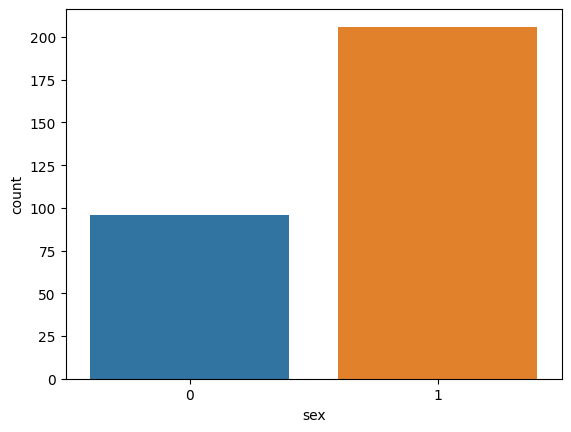

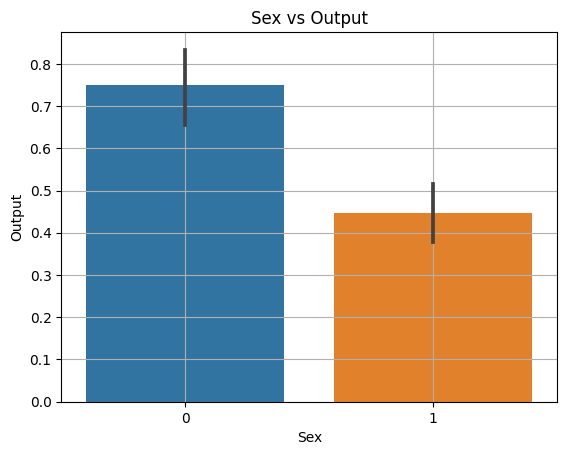

In [15]:
# column sex
s=(heart.sex.value_counts())
print(f'Number of people having sex as 1 are {s[0]} and Number of people having sex as 0 are {s[1]}')
p = sns.countplot(data=heart, x="sex")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x= heart["sex"],y= heart["output"])
plt.grid(True)
plt.xlabel("Sex")
plt.ylabel("Output")
plt.title("Sex vs Output")
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


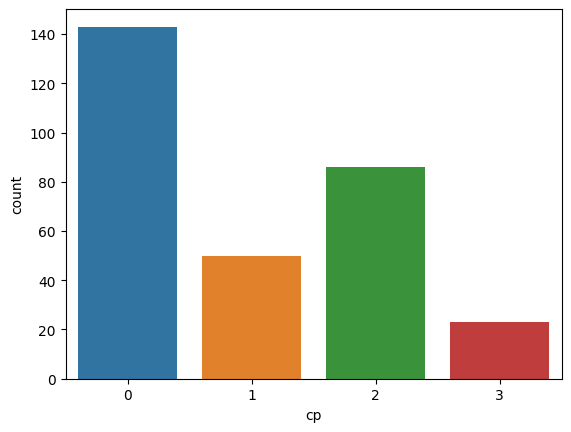

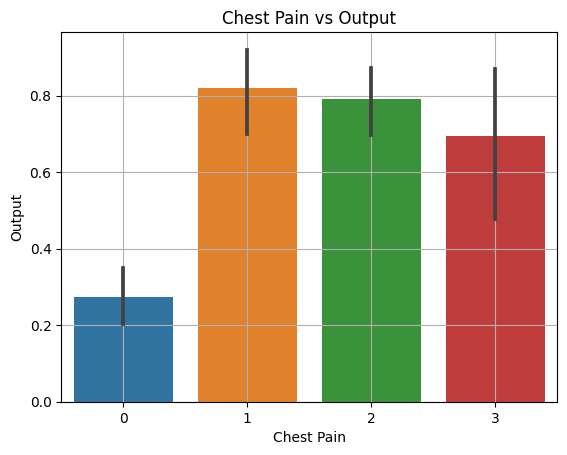

In [16]:
# column cp
c=(heart.cp.value_counts())
print(c)
p = sns.countplot(data=heart, x="cp")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x= heart["cp"],y= heart["output"])
plt.grid(True)
plt.xlabel("Chest Pain")
plt.ylabel("Output")
plt.title("Chest Pain vs Output")
plt.show()

fbs
0    257
1     45
Name: count, dtype: int64


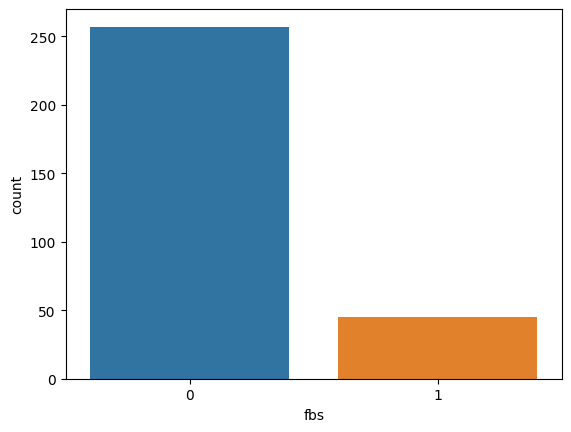

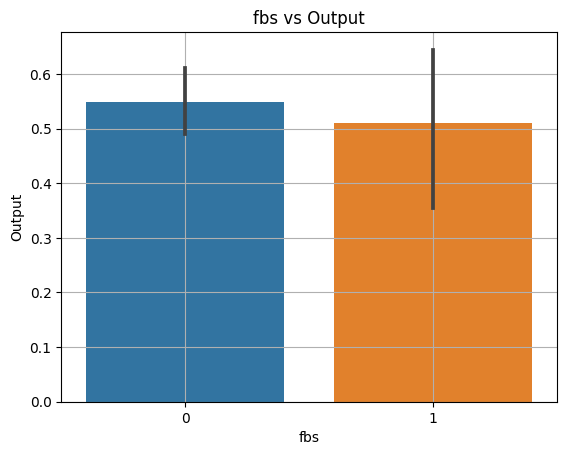

In [17]:
# column fbs
f=(heart.fbs.value_counts())
print(f)
p = sns.countplot(data=heart, x="fbs")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x= heart["fbs"],y= heart["output"])
plt.grid(True)
plt.xlabel("fbs")
plt.ylabel("Output")
plt.title("fbs vs Output")
plt.show()

restecg
1    151
0    147
2      4
Name: count, dtype: int64


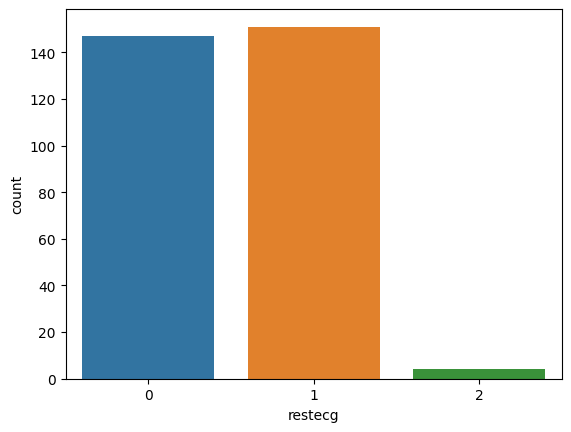

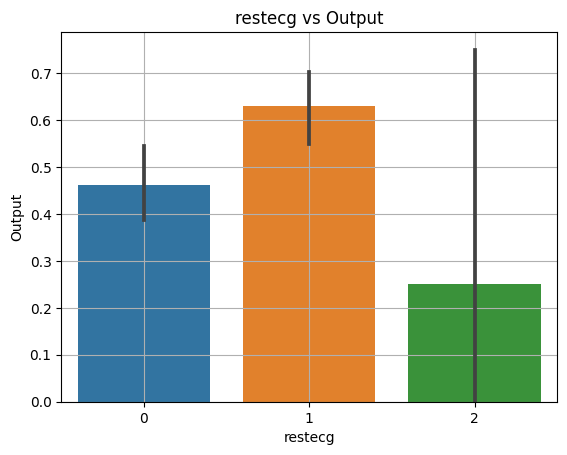

In [18]:
# column restecg
r=(heart.restecg.value_counts())
print(r)
p = sns.countplot(data=heart, x="restecg")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x=heart["restecg"],y=heart["output"])
plt.grid(True)
plt.xlabel("restecg")
plt.ylabel("Output")
plt.title("restecg vs Output")
plt.show()

exng
0    203
1     99
Name: count, dtype: int64


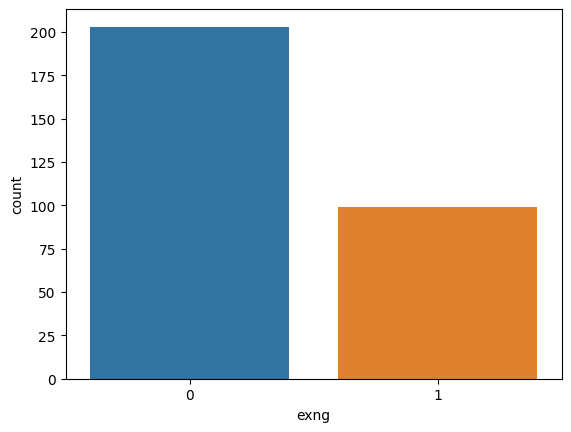

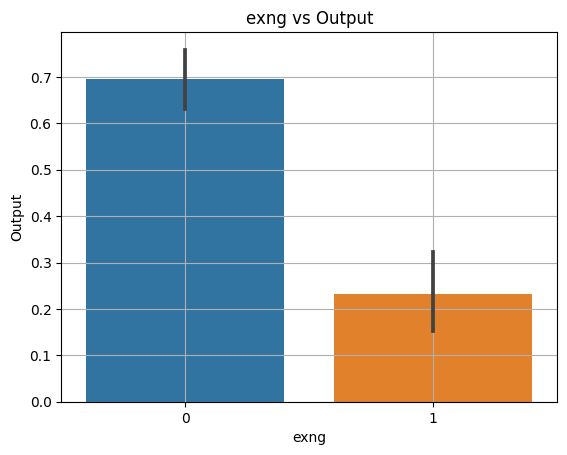

In [19]:
# column exng
e=(heart.exng.value_counts())
print(e)
p = sns.countplot(data=heart, x="exng")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x= heart["exng"],y= heart["output"])
plt.grid(True)
plt.xlabel("exng")
plt.ylabel("Output")
plt.title("exng vs Output")
plt.show()

caa
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


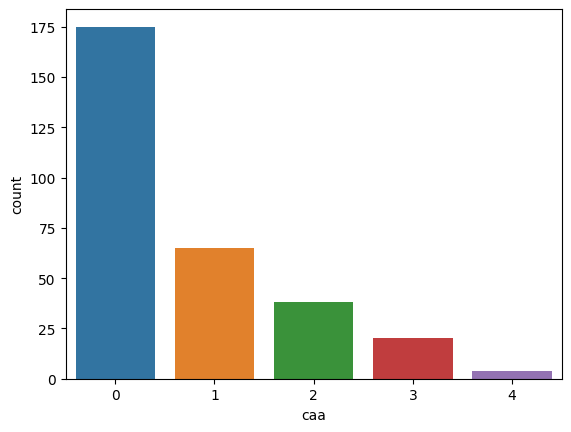

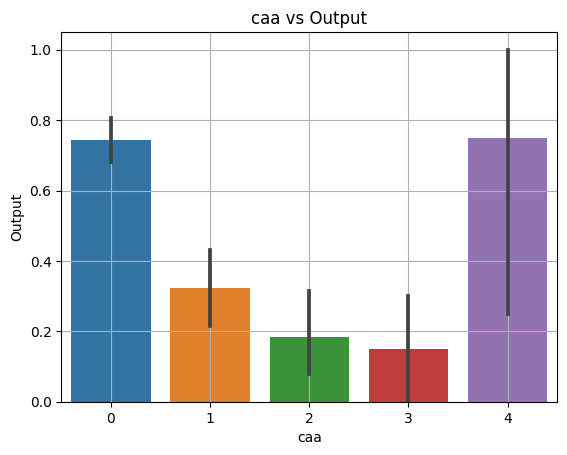

In [20]:
# column caa
ca=(heart.caa.value_counts())
print(ca)
p = sns.countplot(data=heart, x="caa")
plt.show()
# relevance with output
plt.figure()
sns.barplot(x= heart["caa"],y= heart["output"])
plt.grid(True)
plt.xlabel("caa")
plt.ylabel("Output")
plt.title("caa vs Output")
plt.show()

thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64


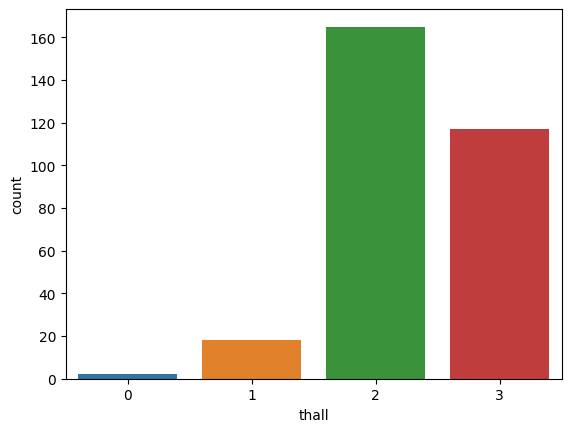

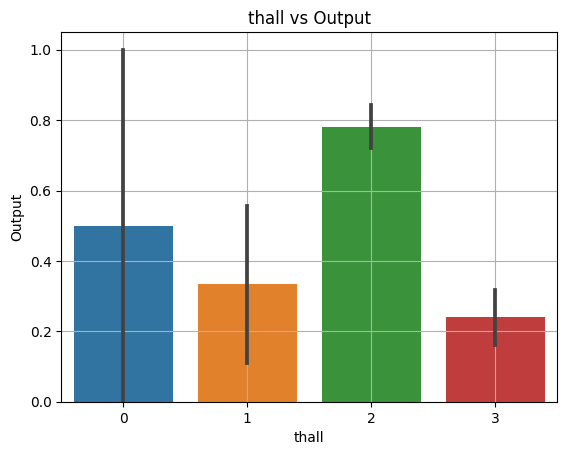

In [21]:
# column thall
t=(heart.thall.value_counts())
print(t)
p = sns.countplot(data=heart, x="thall")
plt.show()
# relevanc with output
plt.figure()
sns.barplot(x= heart["thall"],y= heart["output"])
plt.grid(True)
plt.xlabel("thall")
plt.ylabel("Output")
plt.title("thall vs Output")
plt.show()

In [24]:
# for continuous columns now
# warnings.filterwarnings("ignore", message="`distplot` is a deprecated function")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/912139938.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

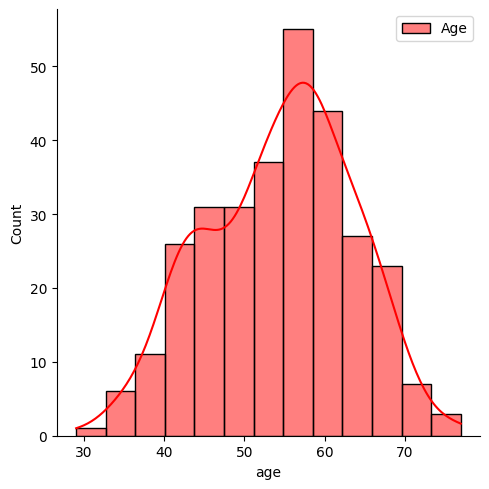

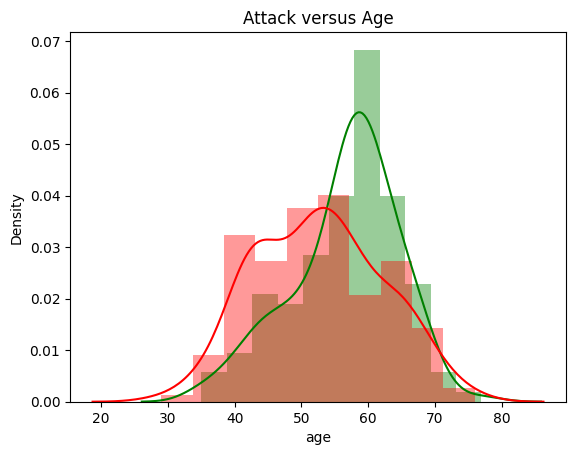

In [25]:
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
# column age
sns.displot(heart["age"], color="red", label="Age", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/595290610.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Figure size 640x480 with 0 Axes>

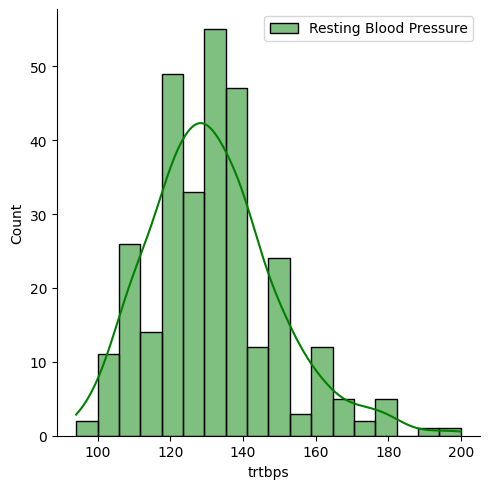

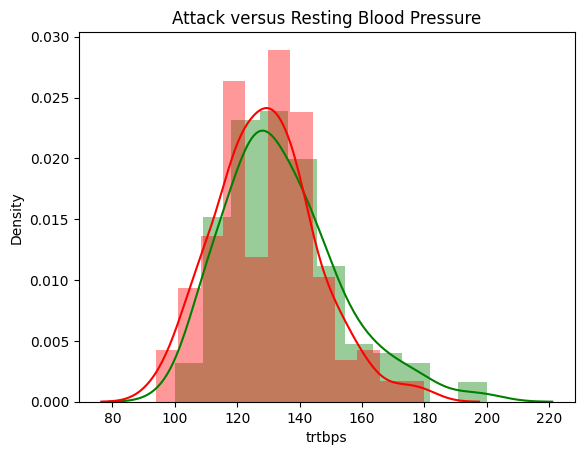

In [26]:
# column trtbps
plt.figure()
sns.displot(heart["trtbps"] , color="g", label="Resting Blood Pressure", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Attack versus Resting Blood Pressure')
plt.show()

In [ ]:
# column chol
plt.figure()
sns.displot(heart["chol"] , color="b", label="Cholestrol", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Attack versus Cholestrol')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/848198747.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Figure size 640x480 with 0 Axes>

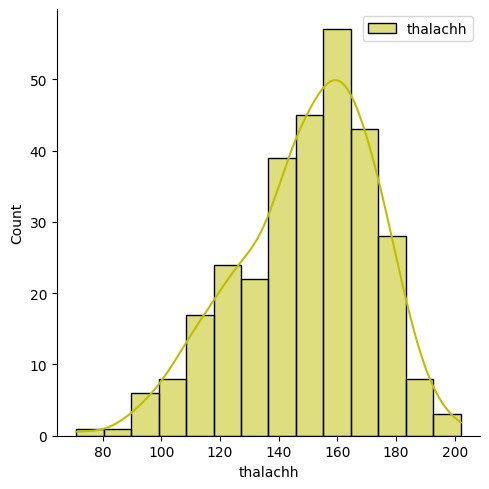

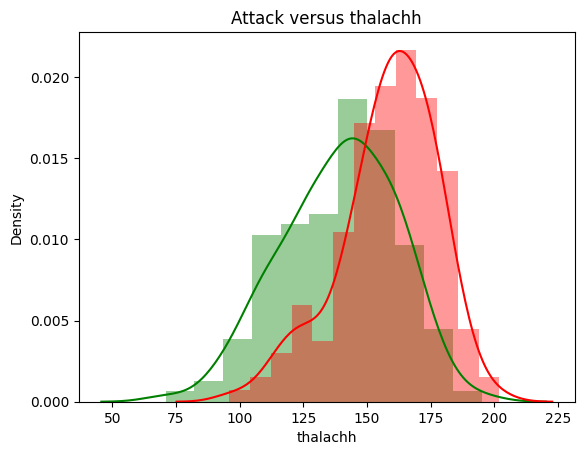

In [27]:
# column thalachh
plt.figure()
sns.displot(heart["thalachh"] , color="y", label="thalachh", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Attack versus thalachh')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2005098852.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["oldpeak"], color='green',kde=True,)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Figure size 640x480 with 0 Axes>

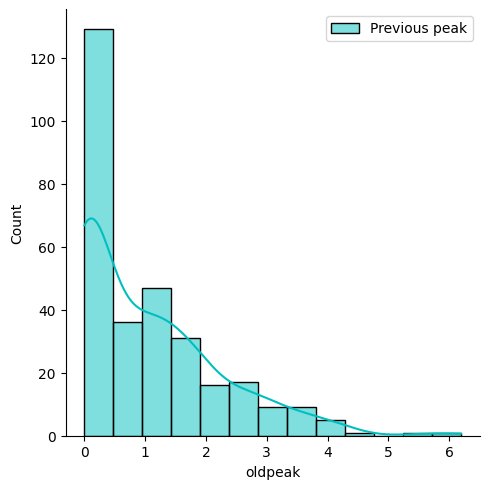

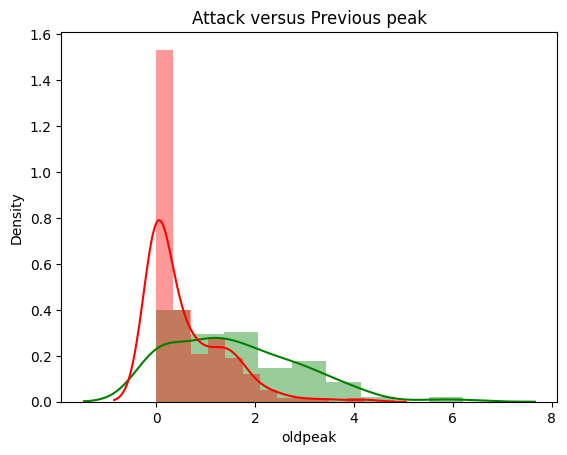

In [28]:
# column oldpeak
plt.figure()
sns.displot(heart["oldpeak"] , color="c", label="Previous peak", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["oldpeak"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["oldpeak"], color='red',kde=True)
plt.title('Attack versus Previous peak')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/3127404387.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["slp"], color='green',kde=True,)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

<Figure size 640x480 with 0 Axes>

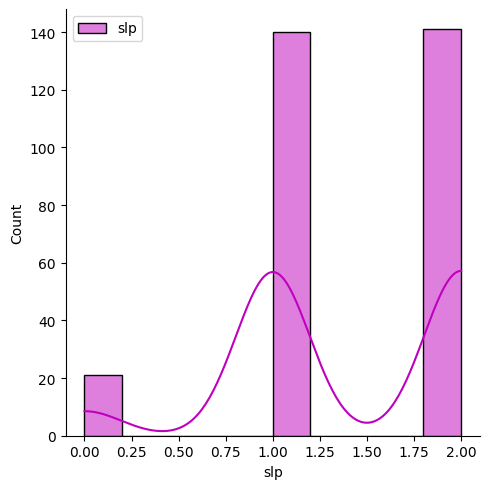

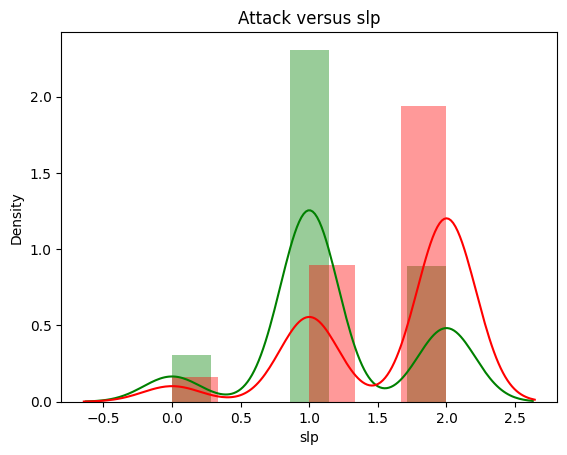

In [29]:
# column slp
plt.figure()
sns.displot(heart["slp"] , color="m", label="slp", kde= True)
plt.legend()
# relevance with output
plt.figure()
sns.distplot(heart[heart['output'] == 0]["slp"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["slp"], color='red',kde=True)
plt.title('Attack versus slp')
plt.show()

In [30]:
# replacing infinte values with NaN so as to avoid errors
heart.replace([np.inf, -np.inf], np.nan, inplace=True)
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

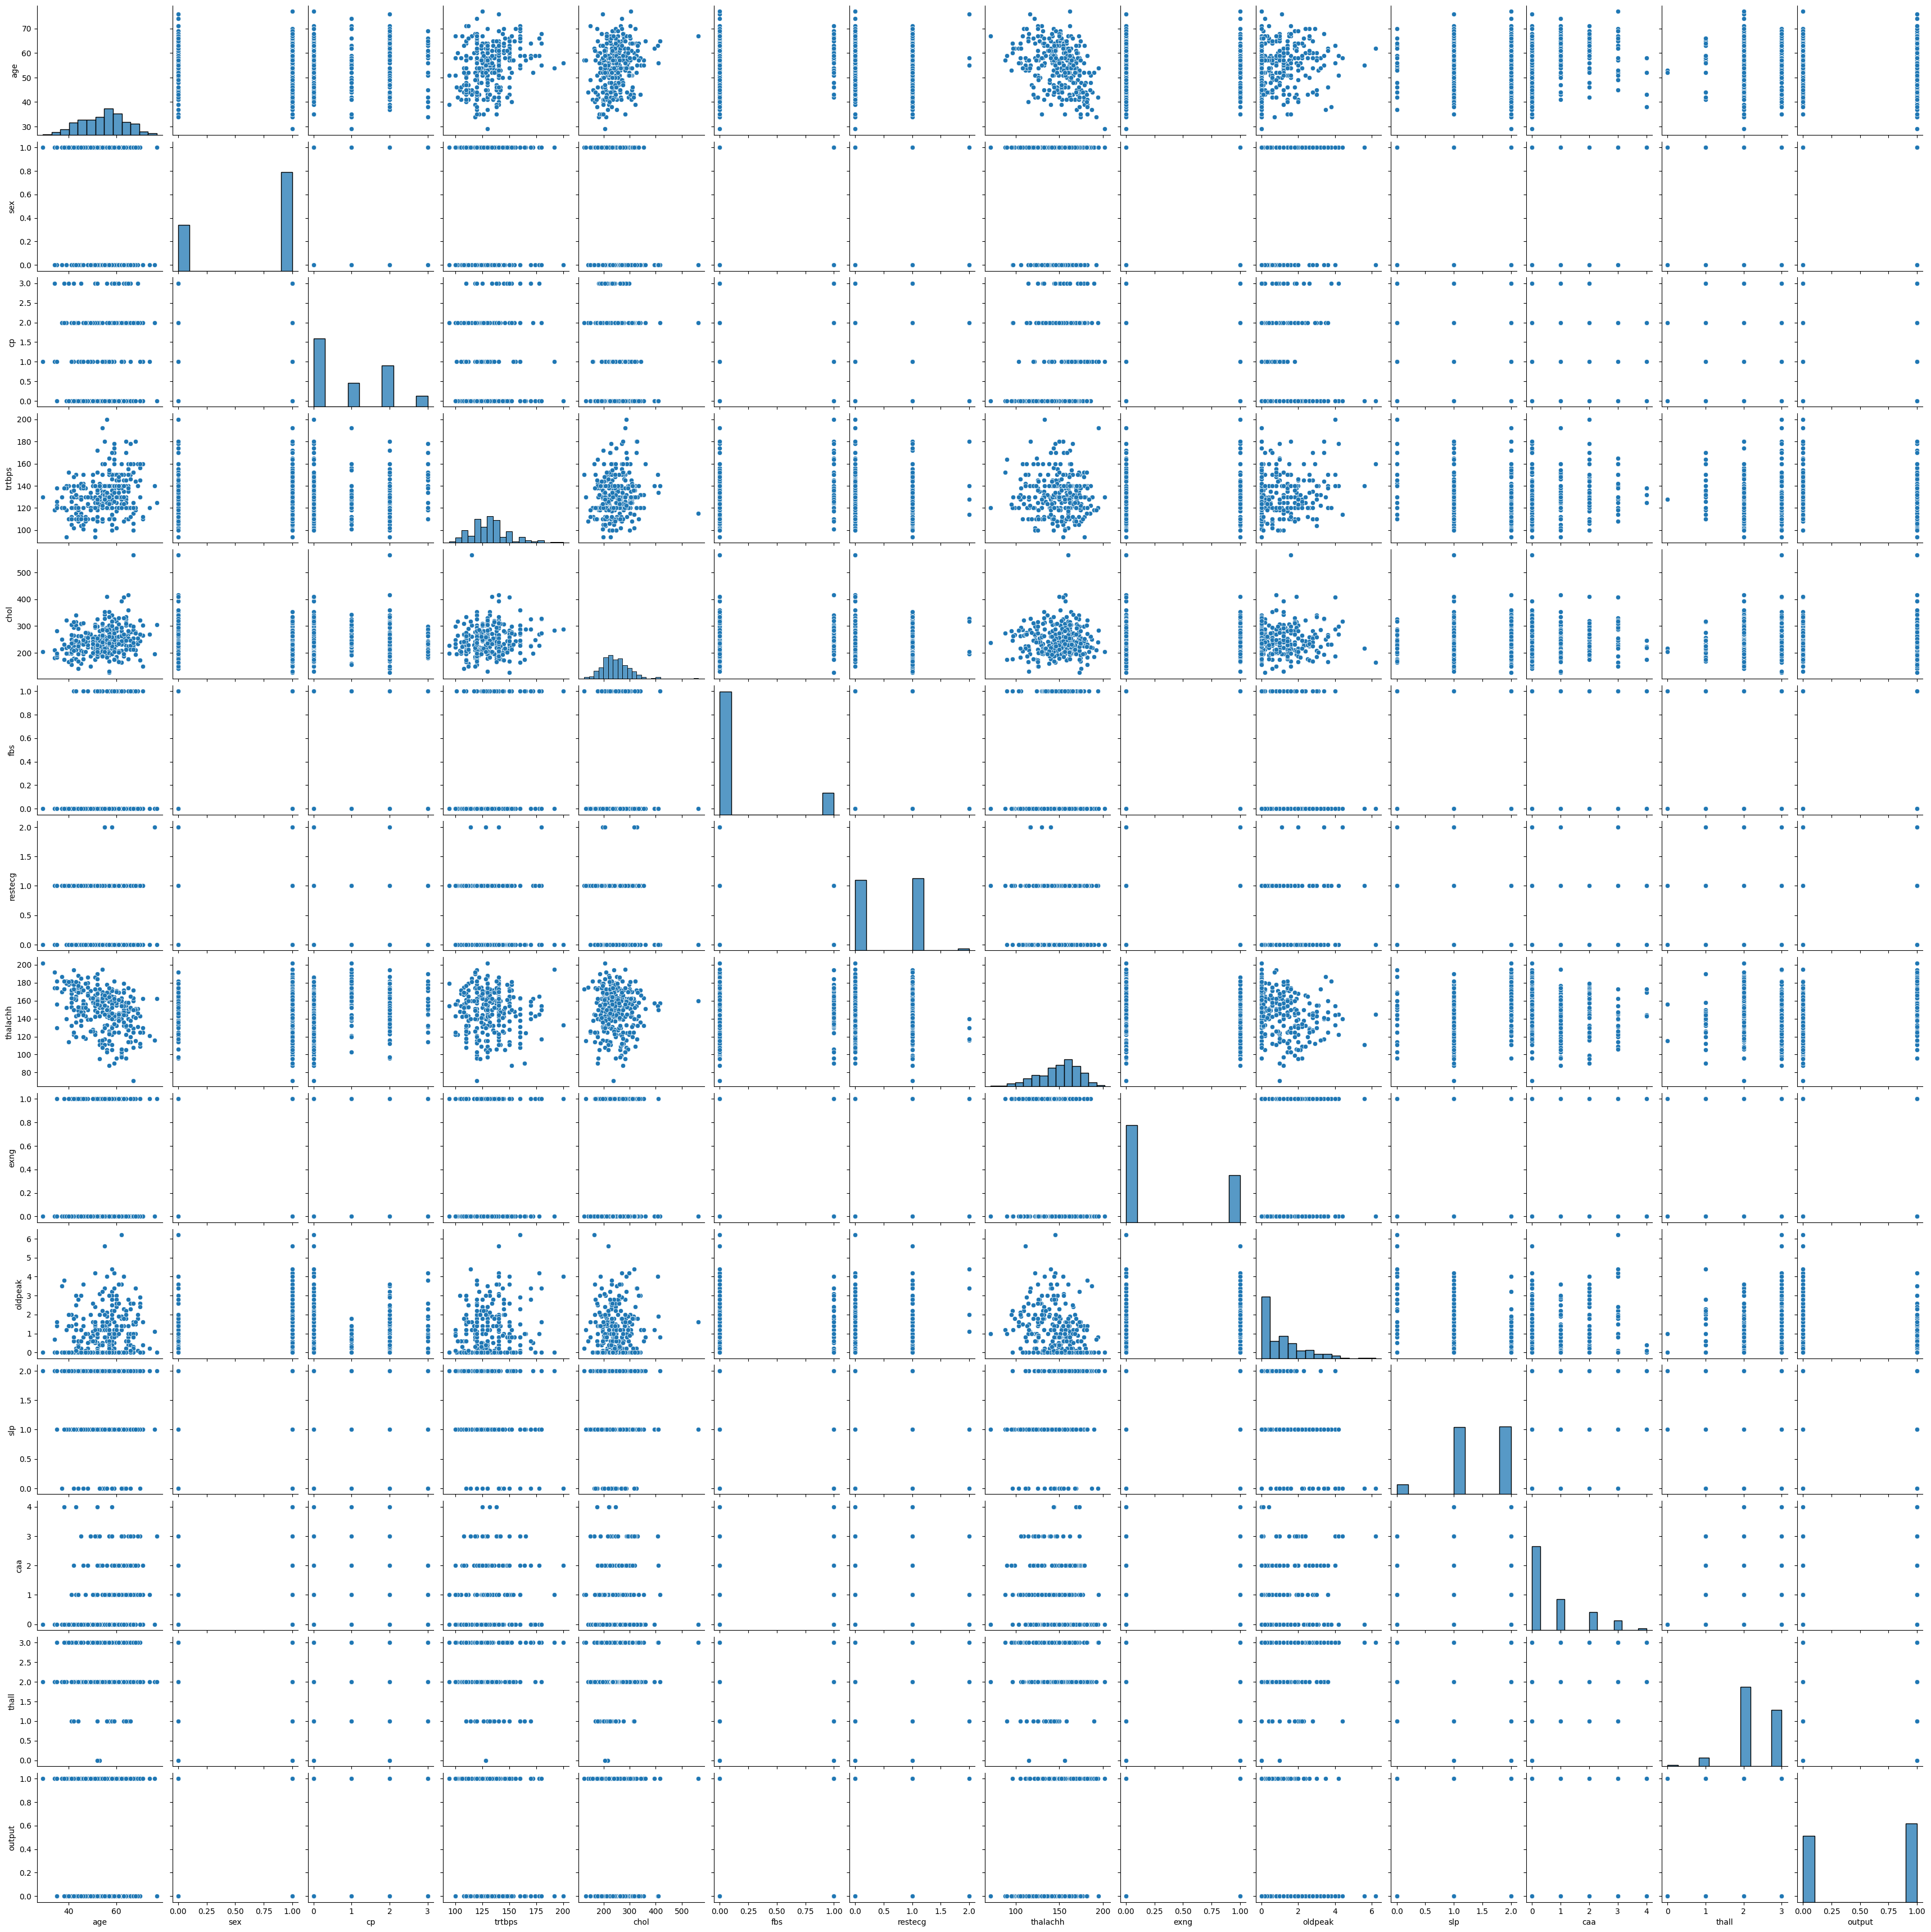

In [60]:
# paiplot
sns.pairplot(heart)

In [31]:
y=heart.corr()

In [32]:
y

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


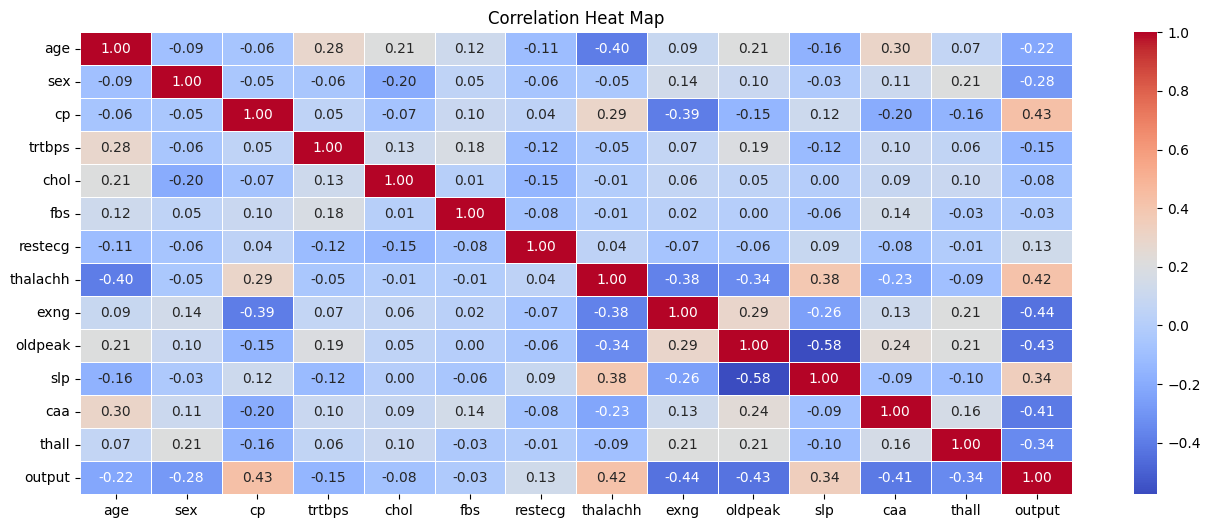

In [33]:
# heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(y, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

In [151]:
from sklearn.model_selection import train_test_split
x = heart[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','slp','caa','thall']]
y = heart['output']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((256, 11), (256,), (46, 11), (46,))

In [90]:
from sklearn.metrics import accuracy_score

In [152]:
# # logistic regression
from sklearn.linear_model import LogisticRegression
lClf=LogisticRegression(max_iter=1000)
lClf.fit(xtrain,ytrain)

predicted_lClf= lClf.predict(xtest)

# # checking accuracy

score_lClf = accuracy_score(ytest,predicted_lClf)
score_lClf

0.9347826086956522

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)  
rf.fit(xtrain, ytrain)  

predicted_rf = rf.predict(xtest)

# checking accuracy
score_rf = accuracy_score(ytest, predicted_rf.round())
score_rf

0.8913043478260869